In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso


In [2]:
df_original = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')

In [3]:
print(f'Training set shape{df_original.shape}')
print(f'Testing set shape{test.shape}')

Training set shape(2051, 81)
Testing set shape(879, 80)


In [4]:
df_original.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [5]:
df_original.set_index('Id').sort_values('Id')
#set Id as index

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,215000
3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,172000
5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,189900
8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,191500
9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,236500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924,923250060,20,RL,80.0,17400,Pave,NaN,Reg,Low,AllPub,...,0,0,NaN,NaN,NaN,0,5,2006,WD,160000
2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,NaN,0,3,2006,WD,142500
2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,0,NaN,MnPrv,NaN,0,6,2006,WD,131000


In [6]:
living = ['1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area','SalePrice']

In [7]:
bsmt=['BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']

In [8]:

Masv = ['Mas Vnr Type','Mas Vnr Area','SalePrice']
Garage = ['Garage Type','Garage Yr Blt','Garage Finish',
          'Garage Cars','Garage Area','Garage Qual','Garage Cond','SalePrice']

In [9]:
df_original[Garage]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,SalePrice
0,Attchd,1976.0,RFn,2.0,475.0,TA,TA,130500
1,Attchd,1997.0,RFn,2.0,559.0,TA,TA,220000
2,Detchd,1953.0,Unf,1.0,246.0,TA,TA,109000
3,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,174000
4,Detchd,1957.0,Unf,2.0,484.0,TA,TA,138500
...,...,...,...,...,...,...,...,...
2046,Attchd,2007.0,Fin,2.0,520.0,TA,TA,298751
2047,Detchd,1961.0,Unf,2.0,539.0,TA,TA,82500
2048,Detchd,1929.0,Unf,2.0,342.0,Fa,Fa,177000
2049,Attchd,1956.0,Unf,1.0,294.0,TA,TA,144000


In [10]:
df=df_original #create a copy of data and called it df

#### Attempt 1 
Was trying to delete all the value that contain a high portion of null. Using the code below, but didn't work well because the null value actually contains some information. So I commited this method out

In [11]:
# too_much_nan = df_original.loc[:,df_original.isnull().mean()>0.5].columns
# Getting the columns that have NaN data more than 50% 
# df.drop(columns = too_much_nan,inplace = True)

### Step 1: Divide Variable and Select
Seperate all the independent variables into 2 category, Numerical and Object.

In [12]:
df_numerical=[]
df_object=[]
for i in df.columns:
    if (df[i].dtype == 'float64') or (df[i].dtype == 'int64'):
        df_numerical.append(i)
    elif df[i].dtype == 'object':
        df_object.append(i)
#define 2 different data types of columns

#### 1.1 Cleaning object type
##### 1.1.1 Exclude the too much biased data
Define if a columns have more than 95% are the same value as a "Too much biased data". It cantain's not too much information

In [13]:
# Cleaning object type

#find the columns that's extremely biased (defined as some attribute have more than 70% of count)
too_much_biased = [i for i in df_object if (df[i].value_counts(dropna=False)[0]/2051)>0.95]
df.drop(columns = too_much_biased, inplace=True)

In [14]:
too_much_biased
#deleted the following columns

['Street',
 'Utilities',
 'Land Slope',
 'Condition 2',
 'Roof Matl',
 'Heating',
 'Pool QC',
 'Misc Feature']

In [15]:
df_object = [n for n in df_object if n not in too_much_biased]
#exclude the too much biased columns

##### 1.1.2 Correlation
Create function to use get dummies method for object data and than use correlation to find the correlation for all the result. Create a list of variables that have higher than 30% correlation with SalePrice

In [16]:
def objtest(df_object):
    lis = []
    for i in df_object:
        YY = pd.get_dummies(df[i])
        YY = YY.join(df_original['SalePrice'])
        
        corrlist = abs(YY.corr()['SalePrice'].drop('SalePrice')).sort_values(ascending = False)  
        if np.max(corrlist) > 0.3:
#             plt.figure(figsize = (15,10))
#             sns.heatmap(YY.corr(), cmap = 'Blues', annot=True)
#             plt.title(df[i].name, size = 20)          
            lis.append(df[i].name)
        else: pass
    return lis
# Create a list

In [17]:
objtest(df_object) #selecting all object that have bigger than 0.3 corr with price

['Lot Shape',
 'Neighborhood',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'Heating QC',
 'Kitchen Qual',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Sale Type']

##### 1.1.3 Plot the bar chart
Use the following code to plot all the bar chart that shows the category vs SalePrice. To see the is there certain category have higher SalePrice

Commited out because it take too much memory

In [18]:
#pick the relevant object columns
# for i in df_object:
#     plt.figure(figsize = (5,5))
#     plt.title(i)
#     df.groupby(i)['SalePrice'].mean().plot.bar()

##### 1.1.4 Manually pick possible object type data


In [19]:
picked_object = ['Lot Shape',
 'Neighborhood',
 'Exterior 1st',
 'Fence', #added
 'Pool Area', #added
 'MS Zoning', #added
 'Alley', #added
 'Central Air',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Low Qual Fin SF',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating QC',
 'Kitchen Qual',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Sale Type']

#### 1.2 Clean numerical data

##### 1.2.1 Scatter Plot
Create scatter for all the variables to see the relation with SalePrice

Comment out because it take too much memory

In [20]:
#look into scatter plot to find potential linear relation trends
# for i in df_numerical:
#     plt.figure(figsize = (5,5))
#     plt.title(i)
#     plt.scatter(df[i],df['SalePrice'])
# by drawing all the scatter plot we can pick the variables that have almost linear relation to the sale price

##### 1.2.2 Correlation
Get the correlation with SalePrice that's bigger than 30%

In [21]:
nu = df[df_numerical]
abs(nu.corr()['SalePrice']).sort_values(ascending  = False).head(18).index

Index(['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Area',
       'Garage Cars', 'Total Bsmt SF', '1st Flr SF', 'Year Built',
       'Year Remod/Add', 'Full Bath', 'Garage Yr Blt', 'Mas Vnr Area',
       'TotRms AbvGrd', 'Fireplaces', 'BsmtFin SF 1', 'Lot Frontage',
       'Open Porch SF', 'Wood Deck SF'],
      dtype='object')

##### 1.2.3 Pick numerical data
Manually pick numerical data


In [22]:
len(picked_object)

24

In [23]:

picked_numerical = ['Id',
    'SalePrice', 
 'Mo Sold',
 'Yr Sold',
 'Overall Qual', 
 'Overall Cond',
 'Gr Liv Area', 
 'Garage Area',
 'Garage Cars', 
 'Total Bsmt SF', 
 '1st Flr SF', 
 'Year Built',
 'Year Remod/Add', 
 'Mas Vnr Area',
 'Full Bath', 
 'Garage Yr Blt', 
 'Bedroom AbvGr',
 'Mas Vnr Area',  
 'TotRms AbvGrd', 
 'Fireplaces', 
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Lot Frontage',
 'Open Porch SF', 
 'Wood Deck SF']

## Now we have all the columns we selected baed on plot and correlation

In [24]:
df = df[picked_numerical + picked_object]

In [25]:
df.columns
#manually picked the columns

Index(['Id', 'SalePrice', 'Mo Sold', 'Yr Sold', 'Overall Qual', 'Overall Cond',
       'Gr Liv Area', 'Garage Area', 'Garage Cars', 'Total Bsmt SF',
       '1st Flr SF', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'Full Bath', 'Garage Yr Blt', 'Bedroom AbvGr', 'Mas Vnr Area',
       'TotRms AbvGrd', 'Fireplaces', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Lot Frontage', 'Open Porch SF', 'Wood Deck SF',
       'Lot Shape', 'Neighborhood', 'Exterior 1st', 'Fence', 'Pool Area',
       'MS Zoning', 'Alley', 'Central Air', 'Exterior 2nd', 'Mas Vnr Type',
       'Low Qual Fin SF', 'Exter Qual', 'Exter Cond', 'Foundation',
       'Bsmt Qual', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2',
       'Heating QC', 'Kitchen Qual', 'Fireplace Qu', 'Garage Type',
       'Garage Finish', 'Sale Type'],
      dtype='object')

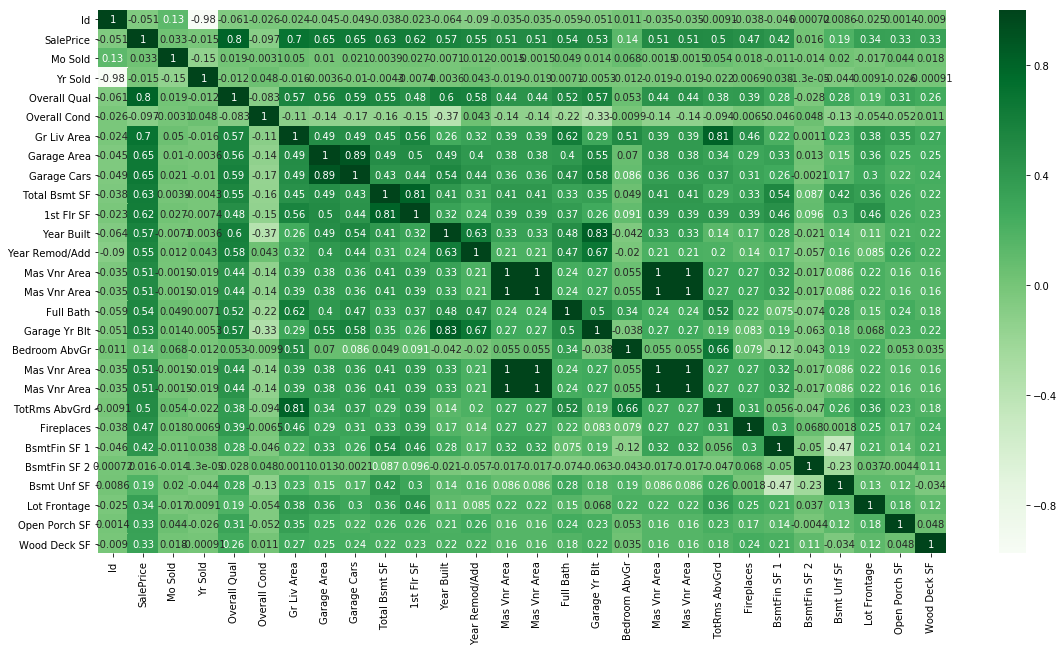

In [26]:
#plot the correlation between all the numerical data. Drop the protentially inner correlated data
plt.figure(figsize = (19,10))
sns.heatmap(df[picked_numerical].corr(), annot = True, cmap = 'Greens');

In [27]:
df = df.fillna(0)

In [28]:
#select same columns for test data
selected_col = list(df.columns)
selected_col.remove('SalePrice')
test = test[selected_col]
test = test.fillna(0)

### Step 2 Clean Object Columns
##### 2.1 Rename Oridinal data

In [29]:
df_original.groupby('Neighborhood')['SalePrice'].median().index

Index(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
       'Crawfor', 'Edwards', 'Gilbert', 'Greens', 'GrnHill', 'IDOTRR',
       'Landmrk', 'MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 'NWAmes',
       'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW',
       'Somerst', 'StoneBr', 'Timber', 'Veenker'],
      dtype='object', name='Neighborhood')

In [30]:
#Remane all the ordinal data
df = df.replace(['Ex','Gd','TA','Fa','Po'],[5,4,3,2,1])
df  = df.replace(['GLQ','ALQ','BLQ','Rec','LwQ','Unf'], [5,4,3,2,1,0.5])
df = df.replace(['Fin','RFn','Unf'], [1,0.75,0.5])

test = test.replace(['Ex','Gd','TA','Fa','Po'],[5,4,3,2,1])
test  = test.replace(['GLQ','ALQ','BLQ','Rec','LwQ','Unf'], [5,4,3,2,1,0.5])
test = test.replace(['Fin','RFn','Unf'], [1,0.75,0.5])

In [31]:
#create function to check each object data I want to visulase
def checkobj(trying):
    plt.figure(figsize = (15,9))
    ax1 = plt.subplot(211)
    ax1.bar(df_original[trying].value_counts().index,df_original[trying].value_counts());
    ax1.set_title(f'{trying} count')
    ax1.set_ylabel('Count')

    ax2 = plt.subplot(212)
    ax2.bar(df_original[trying].value_counts().index, df_original.groupby(trying)['SalePrice'].mean(),color = 'orange');
    ax2.set_title(f'{trying} vs Sale Price')
    ax2.set_ylabel('Average Housing Price');

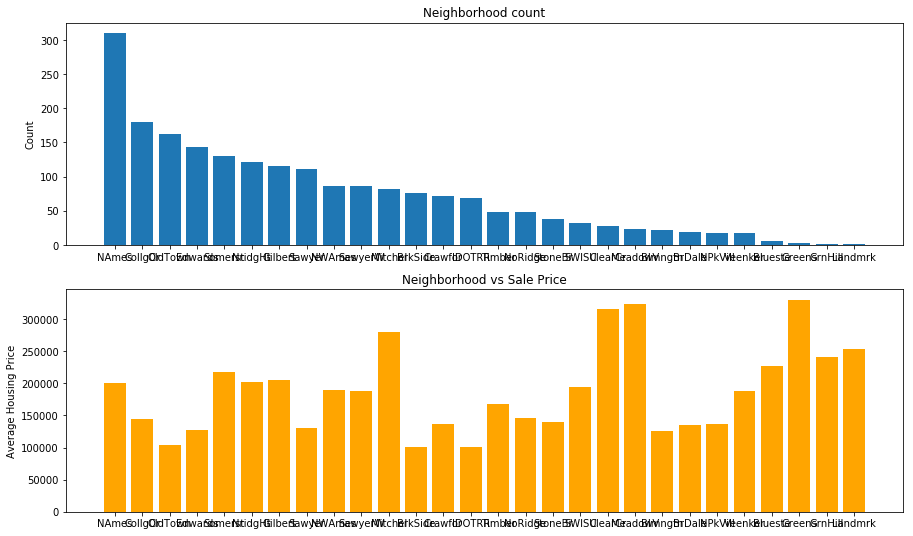

In [32]:
checkobj('Neighborhood')

##### 2.2 Cleaning, get dummy and so on

In [33]:
fine_neighbour  = ['NridgHt','NoRidge','StoneBr','GrnHill'] #These 3 neighbour have average higher Sale Price
poor_neighbour = ['MeadowV', 'IDOTRR','BrDale','OldTown','BrkSide', 'Edwards' , 'SWISU', 'Landmrk', 'Sawyer', 'Landmrk']
fine_garage_type = ['Attchd','BuiltIn'] # These 2 type grage have higher price
mas_vnr = ['Stone','BrkFace'] # better  mas vnr
vinyisd = ['VinylSd','Stone','ImStucc','CemntBd','BrkFace'] # Better Exterior Material
Pconc = ['PConc'] #Pconc fundation have higher price
lot_shape = ['Reg'] # Reguler Shape have lower Shape
bsmt_expos = ['No']
sale_new = ['New']
garage_f = [1,'Fin']
zone1 = ['FV','RL'] #suburb
zone2 = ['RH','RM'] #downtown



def getdummy(df):
    df['fine_neighbour'] = df['Neighborhood'].map(lambda x: 1 if x in fine_neighbour else 0)
    df['poor_neighbour'] = df['Neighborhood'].map(lambda x: 1 if x in poor_neighbour else 0)
    df['fine_garage_type'] = df['Garage Type'].map(lambda x: 1 if x in fine_garage_type else 0)
    df['mv'] = df['Mas Vnr Type'].map(lambda x: 1 if x in mas_vnr else 0)
    df['garage_finish'] = df['Garage Finish'].map(lambda x: 1 if x in garage_f else 0)
    df['zone1'] = df['MS Zoning'].map(lambda x: 1 if x in zone1 else 0)
    df['zone2'] = df['MS Zoning'].map(lambda x: 1 if x in zone2 else 0)
    df[['Grvl','Pave']] = pd.get_dummies(df.Alley, drop_first=True)
    df['VinylSd1'] = df['Exterior 1st'].map(lambda x: 1 if x in vinyisd else 0)
    df['VinylSd2'] = df['Exterior 2nd'].map(lambda x: 1 if x in vinyisd else 0)
    df['Pconc'] = df['Foundation'].map(lambda x: 1 if x in Pconc else 0)
    df['reg_lot'] = df['Lot Shape'].map(lambda x: 1 if x in lot_shape else 0)
    df['np_bsmt_expo'] = df['Bsmt Exposure'].map(lambda x: 1 if x in bsmt_expos else 0)
    df['sale_new'] = df['Sale Type'].map(lambda x: 1 if x in sale_new else 0)
    df['Fence'] = df['Fence'].map(lambda x: 0 if x == 0 else 1)
    df['Central Air'] = df['Central Air'].map(lambda x: 0 if x == 'Y' else 1)
    df['bsmtscore'] = [(df.loc[i,'BsmtFin Type 1']*df.loc[i,'BsmtFin SF 1'] +df.loc[i,'BsmtFin Type 2']*df.loc[i,'BsmtFin SF 2'] + 0.5*df.loc[i,'Bsmt Unf SF']) for i in range(len(df))]
    df['garagescore'] = [(df.loc[i,'Garage Finish']*df.loc[i,'Garage Area']) for i in range(len(df))]
    df['Low Qual Fin SF'] = df['Low Qual Fin SF'].map(lambda x: 0 if x == 0 else 1)
    df['age'] = df['Yr Sold'] - df['Year Built']
    
    
    need_to_drop = ['Neighborhood',
                    'Garage Type',
                    'Mas Vnr Type',
                    'Garage Finish',
                    'Exterior 1st',
                    'Exterior 2nd',
                    'Foundation',
                    'Lot Shape',
                    'Bsmt Exposure',
                    'Sale Type'
                    ]
    
    finish = df.drop(columns = need_to_drop)
    return finish

In [47]:
finish = getdummy(df)
test_clean = getdummy(test)

### Step 3 Check for outlier and drop them

In [48]:
finish = finish.drop(index = [1885,960]) #2 extra big size 
# finish = finish.drop(index = [1628,183]) #2 extra low price
# finish = finish.drop(index = [1309, 1292, 1518, 1564, 1428, 408, 103, 1089])# all below 50,000 houses


### Step 4 Save to CSV

In [49]:
finish.head(2)

,Id,SalePrice,Mo Sold,Yr Sold,Overall Qual,Overall Cond,Gr Liv Area,Garage Area,Garage Cars,Total Bsmt SF,...,Pave,VinylSd1,VinylSd2,Pconc,reg_lot,np_bsmt_expo,sale_new,bsmtscore,garagescore,age
0,109,130500,3,2010,6,8,1479,475.0,2.0,725.0,...,0,0,0,0,0,1,0,2761.0,356.25,34
1,544,220000,4,2009,7,5,2122,559.0,2.0,913.0,...,0,1,1,1,0,1,0,3323.0,419.25,13


In [50]:
test_clean.head(2)

,Id,Mo Sold,Yr Sold,Overall Qual,Overall Cond,Gr Liv Area,Garage Area,Garage Cars,Total Bsmt SF,1st Flr SF,...,Pave,VinylSd1,VinylSd2,Pconc,reg_lot,np_bsmt_expo,sale_new,bsmtscore,garagescore,age
0,2658,4,2006,6,8,1928,440,1,1020,908,...,0,0,0,0,1,1,0,510.0,220.0,96
1,2718,8,2006,5,4,1967,580,2,1967,1967,...,0,0,0,0,0,1,0,983.5,580.0,29


In [51]:
finish.to_csv('./datasets/train_cleaned.csv',index = False)
test_clean.to_csv('./datasets/test_cleaned.csv', index = False)